# The Spark Foundation 
## By: Karan 
## Task-1 Prediction using Supervised ML
### Problem statment
● predicted score if a student studies for 9.25 hrs/ day

● dataset: http://bit.ly/w-data

# libraries required

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns          

# Importing data 

In [26]:
url=('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
stud=pd.read_csv(url)
stud

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [27]:
# checking for null values
stud.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Hours vs Score

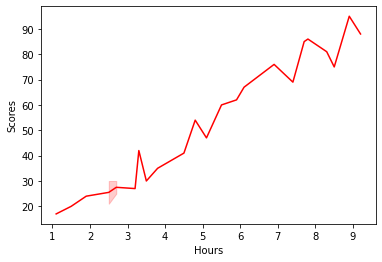

In [4]:
sns.lineplot(x="Hours",y="Scores",data=stud, color='red')
plt.show()

# outliers detection

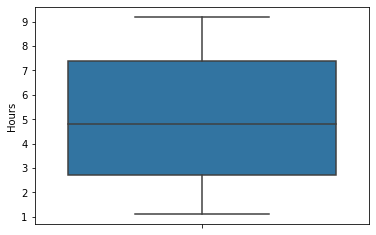

In [5]:
sns.boxplot(y="Hours", data=stud)
plt.show()

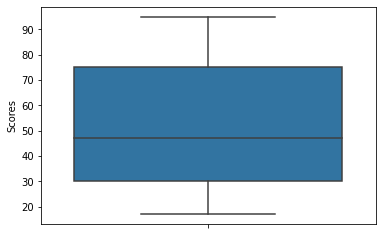

In [6]:
sns.boxplot(y="Scores", data=stud)
plt.show()

# Most time spent  by students

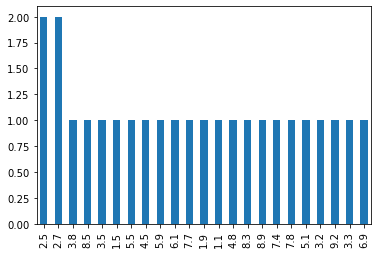

In [7]:
stud['Hours'].value_counts().plot(kind= 'bar')


# Most scored  by students

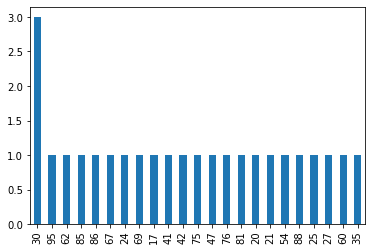

In [8]:
stud['Scores'].value_counts().plot(kind= 'bar')


<p><h2>Observations:</h2></p>
Higher the hours spent the scores are good in number<br>
no outier detected<br>
max spent <b>hours</b> is 2.5 and 2.7<br>
max <b>scored</b> is 30 <br>

# Dividing the data features  into X,y variables

In [9]:
X = stud.iloc[:,:1]
y = stud.iloc[:,1]

# Imported the sklearn library train_test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [11]:
X_train.head()

,Hours
6,9.2
12,4.5
4,3.5
24,7.8
0,2.5


In [12]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train, y_train)

LinearRegression()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted

In [14]:
print(lm.intercept_)
print(lm.coef_)

1.4951421092364043
[9.87171443]


# plotting the best fit line 

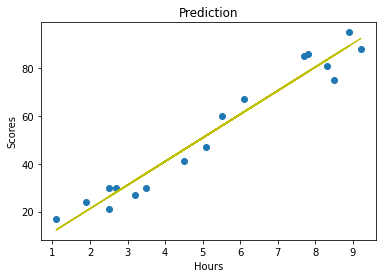

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.495142109236383 + 9.87171443*X_train, 'y')
plt.title("Prediction")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Predict the y values corresponding to X_test_sm

In [16]:
y_pred = lm.predict(X_test)

In [17]:
print(y_pred)

[28.14877107 39.00765694 34.07179972 59.73825724 16.30271375 74.54582888
 69.60997167 48.87937137]


# comparing the actual versus predicted 

In [18]:
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


# plotting the best fit line for the test dataset

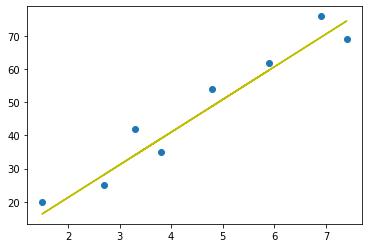

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.495142109236383 + 9.87171443 * X_test, 'y')
plt.show()

# printing the predicted score

In [20]:
pred_score = lm.predict([[9.25]])
print("The predicted score is :",pred_score)

The predicted score is : [92.80850057]


# Returns the mean squared error; we'll take a square root

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160843

In [23]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

In [24]:
mean_absolute_error(y_test, y_pred)

4.762517892332273